In [2]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path1=r"D:\cloud_data\train_red\red_patch_95_5_by_7_LC08_L1TP_064017_20160420_20170223_01_T1.TIF"
path2=r"D:\cloud_data\train_green\green_patch_95_5_by_7_LC08_L1TP_064017_20160420_20170223_01_T1.TIF"
path3=r"D:\cloud_data\train_blue\blue_patch_95_5_by_7_LC08_L1TP_064017_20160420_20170223_01_T1.TIF"
path4=r"D:\cloud_data\train_nir\nir_patch_95_5_by_7_LC08_L1TP_064017_20160420_20170223_01_T1.TIF"
path_5=r"D:\cloud_data\train_gt\gt_patch_95_5_by_7_LC08_L1TP_047023_20160920_20170221_01_T1.TIF"

In [3]:
img1=cv2.imread(path1,0)
img2=cv2.imread(path2,0)
img3=cv2.imread(path3,0)
img4=cv2.imread(path4,0)

In [4]:
img1.shape

(384, 384)

In [3]:
#images=[img4,img2,img1]
import numpy as num

In [6]:
exp=[]
for i in images:
    exp.append(num.expand_dims(i,axis=2))
    

In [7]:
img_comb=num.concatenate(exp[:],axis=2)

In [8]:
img_comb.shape

(384, 384, 3)

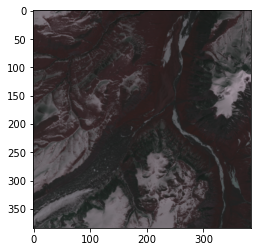

In [9]:
plt.imshow(img_comb)

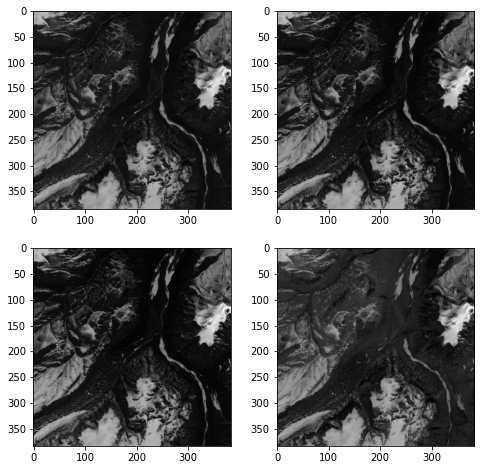

In [10]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(img1,cmap="gray")
plt.subplot(2,2,2)
plt.imshow(img2,cmap="gray")
plt.subplot(2,2,3,)
plt.imshow(img3,cmap="gray")
plt.subplot(2,2,4)
plt.imshow(img4,cmap="gray")

In [4]:
df=pd.read_csv(r"D:\cloud_data\training_patches_38-Cloud.csv")
l=list(df.name)

In [5]:
len(l)

8400

In [6]:
trn_list=l[:5000]
test_list=l[5000:6700]
val_list=l[6700:]

In [7]:
print("length of training list:",len(trn_list))
print("length of test list:",len(test_list))
print("length of validation list:",len(val_list))

length of training list: 5000
length of test list: 1700
length of validation list: 1700


In [8]:
path="D:\cloud_data"
red="train_red"
blue="train_blue"
green="train_green"
gt="train_gt"
nit="train_nir"
#trn_list[150]
import os

In [9]:
img5=cv2.imread(os.path.join(path,red,"red_"+trn_list[151]+".TIF"))

In [10]:
os.path.join(path,red,trn_list[151]+".TIF")

'D:\\cloud_data\\train_red\\patch_106_5_by_18_LC08_L1TP_066017_20160520_20170223_01_T1.TIF'

In [11]:
len(num.unique(img5))

53

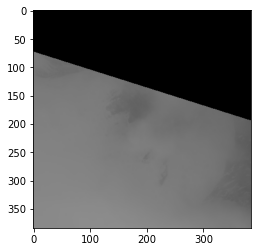

In [12]:
plt.imshow(img5)

In [13]:
def read_img(path):
    image=cv2.imread(path,0)
    return image

In [21]:
train_img=[]
train_mask=[]
c=0
for pt in trn_list:
    red_path=os.path.join(path,red,"red_"+pt+".TIF")
    blue_path=os.path.join(path,blue,"blue_"+pt+".TIF")
    green_path=os.path.join(path,green,"green_"+pt+".TIF")
    gt_path=os.path.join(path,gt,"gt_"+pt+".TIF")
    nir_path=os.path.join(path,nit,"nir_"+pt+".TIF")
    grnd_trth=read_img(gt_path)
    img_l=[]
    
    if len(num.unique(grnd_trth))>1:
        #print("found one",gt_path)
        blue_img=read_img(blue_path)
        red_img=read_img(red_path)
        green_img=read_img(green_path)
        nir_img=read_img(nir_path)
        img_l=[red_img,green_img,blue_img,nir_img]
        #print(len(img_l))
        train_mask.append(num.expand_dims(grnd_trth,axis=2))
        c=c+1
        exp2=[]
        for i in img_l:
            exp2.append(num.expand_dims(i,axis=2))
            #image_combine=num.concatenate(exp2[:],axis=2)
            #print(image_combine.shape)
            
            
        #print(len(exp2))
        image_combine=num.concatenate(exp2[:],axis=2)   
        #print(image_combine.shape)
        train_img.append(image_combine)
          

        

In [22]:
print(c)

2786


In [23]:
train_imgm=num.array(train_img)
train_mask=num.array(train_mask)

In [24]:
print(train_imgm.shape)
print(train_mask.shape)

(2786, 384, 384, 4)
(2786, 384, 384, 1)


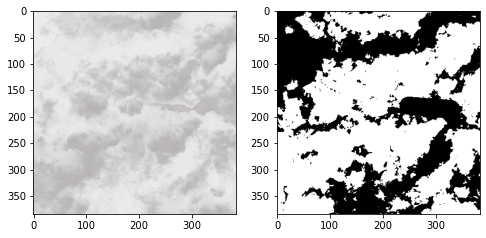

In [25]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(train_imgm[-1],cmap="gray")
plt.subplot(1,2,2)
plt.imshow(train_mask[-1
                     ],cmap="gray")

In [26]:
r,g,b,n=cv2.split(train_imgm[-3])

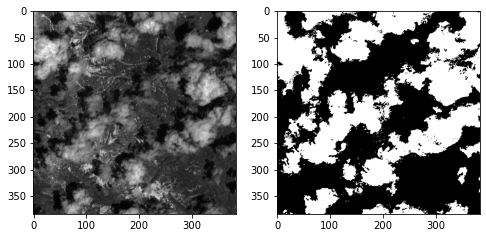

In [27]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(n,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(train_mask[-3],cmap="gray")

In [28]:
img_merg=cv2.merge((r,g,b))

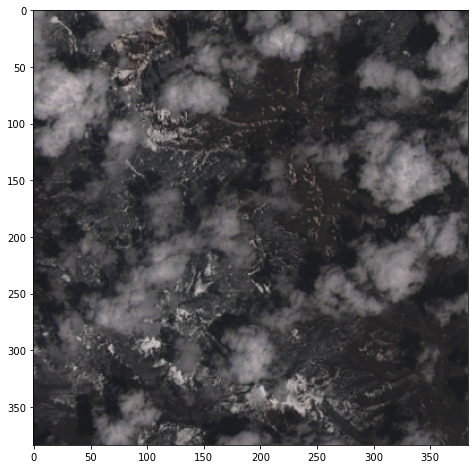

In [29]:
plt.figure(figsize=(8,8))
plt.imshow(img_merg,cmap="gray")

In [16]:
train_NIR_img=[]
train_NIR_mask=[]
c=0
for pt in trn_list:
    red_path=os.path.join(path,red,"red_"+pt+".TIF")
    blue_path=os.path.join(path,blue,"blue_"+pt+".TIF")
    green_path=os.path.join(path,green,"green_"+pt+".TIF")
    gt_path=os.path.join(path,gt,"gt_"+pt+".TIF")
    nir_path=os.path.join(path,nit,"nir_"+pt+".TIF")
    grnd_trth=read_img(gt_path)
    img_l=[]
    
    if len(num.unique(grnd_trth))>1:
        count,weigh=num.unique(grnd_trth,return_counts=True)
        area=weigh[0]/weigh.sum()
        #print("found one",gt_path)
        if area>0.08:
            nir_img=read_img(nir_path)
        
            #print(len(img_l))
            train_NIR_mask.append(num.expand_dims(grnd_trth,axis=2))
            nir_img=num.expand_dims(nir_img,axis=2)
        
            #print(len(exp2))
            #print(image_combine.shape)
            train_NIR_img.append(nir_img)
            c=c+1

        

In [17]:
print(c)

2382


In [18]:
train_NIR_img=num.array(train_NIR_img)
train_NIR_mask=num.array(train_NIR_mask)

In [19]:
print(train_NIR_img.shape)
print(train_NIR_mask.shape)

(2382, 384, 384, 1)
(2382, 384, 384, 1)


In [20]:
train_NIR_img=train_NIR_img/255
train_NIR_mask=train_NIR_mask/255

In [21]:
num.unique(train_NIR_mask)

array([0., 1.])

In [22]:
from tensorflow.keras.utils import to_categorical
cat_labels=to_categorical(train_NIR_mask,num_classes=2)

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_NIR_img,cat_labels,test_size=0.10,random_state=42)

In [43]:
x_train.shape

(2143, 384, 384, 1)

In [24]:
import keras.backend as K
from keras.models import Model
from keras.layers import Input,Convolution2D,Conv2D,Conv2DTranspose,BatchNormalization,Lambda,Flatten,concatenate,Dropout,MaxPooling2D
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [25]:
def build_unet():
    inputs=Input(shape=(384,384,1))
    s=inputs
    c1=Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(s)
    c1=Dropout(0.2)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.2)(c2)  # Original 0.1
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

        #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.2)(c8)  # Original 0.1
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.2)(c9)  # Original 0.1
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(2, (1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [26]:
model=build_unet()

In [27]:
def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [28]:
metrics=['accuracy', jacard_coef]

In [29]:
model.compile(loss=sm.losses.categorical_focal_jaccard_loss,optimizer="adam",metrics=metrics)

In [30]:
import tensorflow as tf

In [44]:
with tf.device("/cpu:0"):
    history=model.fit(x_train,y_train,validation_split=0.1,batch_size=8,epochs=10)

Epoch 1/10
241/241 [==============================] - 1434s 6s/step - loss: 0.2484 - accuracy: 0.9032 - jacard_coef: 0.8134 - val_loss: 0.2289 - val_accuracy: 0.9167 - val_jacard_coef: 0.8387
Epoch 2/10
241/241 [==============================] - 1434s 6s/step - loss: 0.2427 - accuracy: 0.9054 - jacard_coef: 0.8172 - val_loss: 0.2258 - val_accuracy: 0.9162 - val_jacard_coef: 0.8289
Epoch 3/10
241/241 [==============================] - 1435s 6s/step - loss: 0.2387 - accuracy: 0.9074 - jacard_coef: 0.8205 - val_loss: 0.2274 - val_accuracy: 0.9145 - val_jacard_coef: 0.8303
Epoch 4/10
241/241 [==============================] - 1436s 6s/step - loss: 0.2423 - accuracy: 0.9057 - jacard_coef: 0.8177 - val_loss: 0.2096 - val_accuracy: 0.9228 - val_jacard_coef: 0.8456
Epoch 5/10
241/241 [==============================] - 1434s 6s/step - loss: 0.2331 - accuracy: 0.9088 - jacard_coef: 0.8235 - val_loss: 0.2213 - val_accuracy: 0.9173 - val_jacard_coef: 0.8405
Epoch 6/10
241/241 [====================

In [45]:
samp=train_NIR_img[0]

In [46]:
with tf.device("/gpu:0"):
    pred=model.predict(x_test[:3])

In [56]:
trial=pred[1]

In [57]:
trial.shape

(384, 384, 2)

In [58]:
trial_mask=num.argmax(y_test[1],axis=2)

In [59]:
trial_mask.shape

(384, 384)

In [60]:
trial=num.argmax(trial,axis=2)

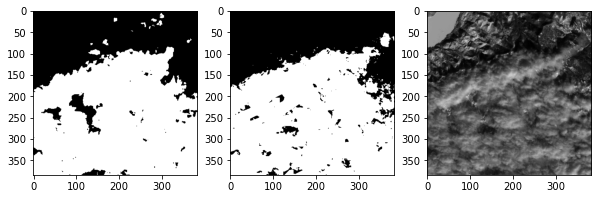

In [62]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(trial,cmap="gray")
plt.subplot(1,3,2)
plt.imshow(trial_mask,cmap="gray")
plt.subplot(1,3,3)
plt.imshow(x_test[1],cmap="gray")

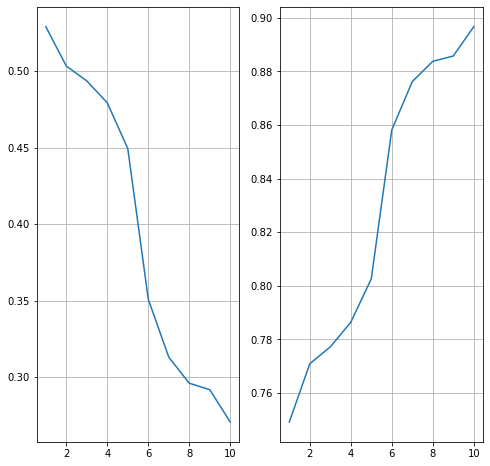

In [41]:
loss=history.history["loss"]
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
epochs=range(1,len(loss)+1)
plt.grid(True)
plt.plot(epochs,loss,label="loss value")
acc=history.history["accuracy"]
plt.subplot(1,2,2)
plt.grid(True)
plt.plot(epochs,acc,label="accuracy")
plt.show()

In [63]:
with tf.device("/gpu:0"):
    model.evaluate(x_test)

8/8 [==============================] - 2s 15ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - jacard_coef: 0.0000e+00
